In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

/tmp/ipykernel_3171972/2573659844.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  light_blues = lighten_cmap(cm.get_cmap('Oranges'), factor=0.5)


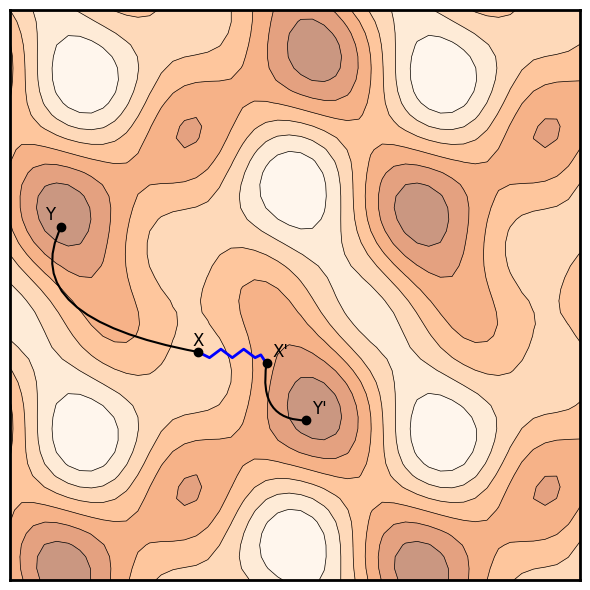

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Generate synthetic topographic data
def generate_topo_data(size=50, scale=10):
    x = np.linspace(0, scale, size)
    y = np.linspace(0, scale, size)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X) * np.cos(Y) + np.sin(2 * X + Y) * 0.5 + np.cos(X - 2 * Y) * 0.3
    return x, y, X, Y, Z

# Lighten a colormap
def lighten_cmap(cmap, factor=0.4):
    colors = cmap(np.linspace(0, 1, 256))
    white = np.ones((256, 4))
    new_colors = colors * (1 - factor) + white * factor
    return ListedColormap(new_colors)

# Bezier curve from p1 to p2 with a control offset
def curved_arrow(p1, p2, control_offset, color='gray', zorder=9):
    ctrl = ((p1[0] + p2[0]) / 2 + control_offset[0], (p1[1] + p2[1]) / 2 + control_offset[1])
    verts = [p1, ctrl, p2]
    codes = [Path.MOVETO, Path.CURVE3, Path.CURVE3]
    path = Path(verts, codes)
    return FancyArrowPatch(path=path, arrowstyle='-', color=color, linewidth=1.5, zorder=zorder)

# Generate data
x, y, X, Y, Z = generate_topo_data()
Z_norm = (Z - Z.min()) / (Z.max() - Z.min())
light_blues = lighten_cmap(cm.get_cmap('Oranges'), factor=0.5)

# Key points
x_coord, y_coord = 3.3, 4
x_prime, y_prime = 4.5, 3.8
target1 = (0.9, 6.2)   # label: Y
target2 = (5.2, 2.8)     # label: Y'

# Zigzag path from X to X'
zigzag_verts = [
    (x_coord, y_coord),
    (x_coord + 0.2, y_coord - 0.1),
    (x_coord + 0.4, y_coord + 0.05),
    (x_coord + 0.6, y_coord - 0.1),
    (x_coord + 0.8, y_coord + 0.05),
    (x_coord + 1.0, y_coord - 0.1),
    (x_coord + 1.1, y_coord - 0.05),
    (x_prime, y_prime)
]
zigzag_codes = [Path.MOVETO] + [Path.LINETO] * (len(zigzag_verts) - 1)
zigzag_path = Path(zigzag_verts, zigzag_codes)
zigzag_arrow = FancyArrowPatch(
    path=zigzag_path,
    arrowstyle='-',
    color='blue',
    linewidth=2,
    mutation_scale=8,
    zorder=10
)

# Curved arrows with stronger curvature
curve1 = curved_arrow((x_coord, y_coord), target1, control_offset=(-2, -0.5), color='black', zorder=12)
curve2 = curved_arrow((x_prime, y_prime), target2, control_offset=(-0.5, -0.5), color='black', zorder=12)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(X, Y, Z_norm, levels=8, cmap=light_blues, zorder=1)
ax.contour(X, Y, Z_norm, levels=8, colors='black', linewidths=0.5, zorder=2)

# Add arrows
ax.add_patch(zigzag_arrow)
ax.add_patch(curve1)
ax.add_patch(curve2)

# Points and labels
ax.plot(x_coord, y_coord, 'o', color='black', zorder=12)
ax.text(x_coord - 0.1, y_coord + 0.2, 'X', color='black', fontsize=12, ha='left', va='center', zorder=12)

ax.plot(x_prime, y_prime, 'o', color='black', zorder=12)
ax.text(x_prime + 0.1, y_prime + 0.2, "X'", color='black', fontsize=12, ha='left', va='center', zorder=12)

ax.plot(*target1, 'o', color='black', zorder=12)
ax.text(target1[0] - 0.1, target1[1] + 0.2, "Y", color='black', fontsize=12, ha='right', va='center', zorder=20)

ax.plot(*target2, 'o', color='black', zorder=12)
ax.text(target2[0] + 0.1, target2[1] + 0.2, "Y'", color='black', fontsize=12, ha='left', va='center', zorder=20)

# Clean up
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

plt.tight_layout()
tikzplotlib.save("method.tex")
plt.show()
